# Probability Distributions

[SciPy](https://scipy.org/)

[scipy.stats](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html)

`conda install scipy`

In [1]:
import scipy.stats as st

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# matplotlib configuration
import matplotlib as mpl
mpl.rcParams["axes.labelsize"] = 18
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["xtick.labelsize"] = 12
mpl.rcParams["ytick.labelsize"] = 12
mpl.rcParams["legend.fontsize"] = 12
# retina display only (e.g. MacOS)
%config InlineBackend.figure_format = 'retina'

## Example

Under basal conditions the resting membrane voltage of a neuron fluctuates around -70 mV with a variance of 10 mV.

---

In this case the random variable is the neuron's resting membrane voltage.

What distribution would you use to model the resting membrane voltage?

In [36]:
mu = -70           # mean resting membrane voltage (mV)
sd = np.sqrt(10)   # standard deviation about the mean

# normal distribution describing the neuron's resting membrane voltage
Vm_dist = st.norm(mu, sd)

The `Vm_dist` object now completely defines the distribution.

We can use the `Vm_dist` object to easily get the probability density at any given membrane voltage.

We just have to remember that we defined the distribtuion with a mean and standard deviation in units of `mV`.

In [37]:
# probability density at -75 mV
Vm_dist.pdf(-75)

0.03614447853363626

By getting the probability density across a whole range of voltages, we can visualize the probability density function.

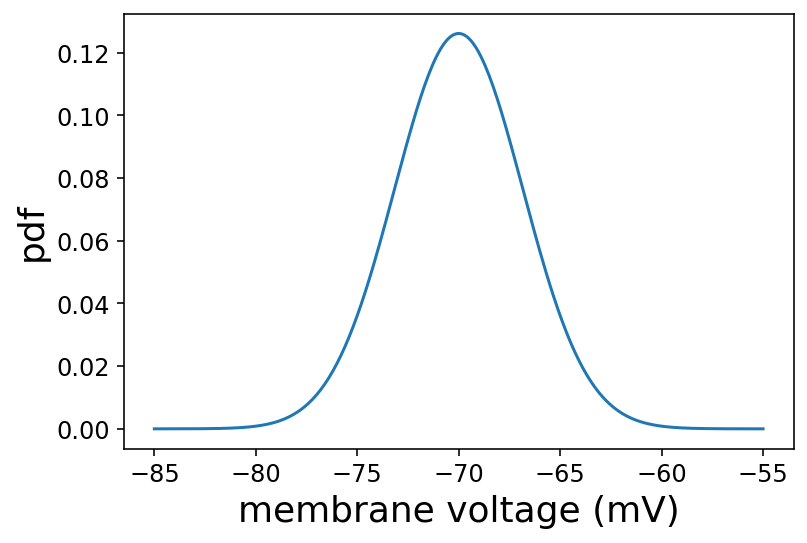

In [38]:
# array of membrane voltages from -85 to -55 mV
mV = np.linspace(-85, -55, 301)

# probability density for each membrane voltage in mV
Vm_pdf = Vm_dist.pdf(mV)

plt.plot(mV, Vm_pdf)
plt.xlabel('membrane voltage (mV)')
plt.ylabel('pdf');

What range of membrane voltages (centered on the mean) account for 95% of the probability?

In [17]:
low = Vm_dist.ppf(0.025)  # first 2.5% of distribution (percent point function)
high = Vm_dist.ppf(0.975) # first 97.5% of distribution

print(f"95% of membrane voltages are expected to fall within {low :.1f} and {high :.1f} mV.")

95% of membrane voltages are expected to fall within -76.2 and -63.8 mV.


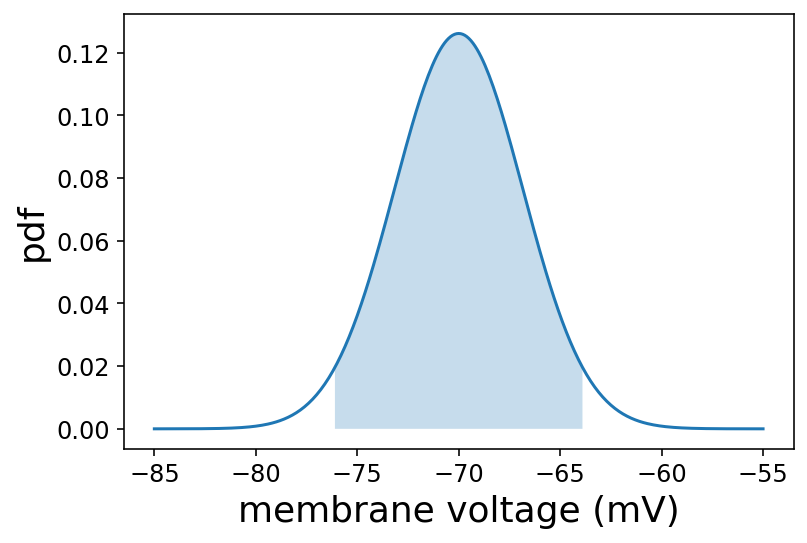

In [39]:
mV95 = mV[(mV >= low) & (mV <= high)]

plt.plot(mV, Vm_dist.pdf(mV))
plt.fill_between(mV95, np.zeros(mV95.shape), Vm_dist.pdf(mV95), alpha=0.25)
plt.xlabel('membrane voltage (mV)')
plt.ylabel('pdf');

By the Central Limit Theorem, what is the distribution describing the mean membrane voltage over a random sample period containing 30 data points?

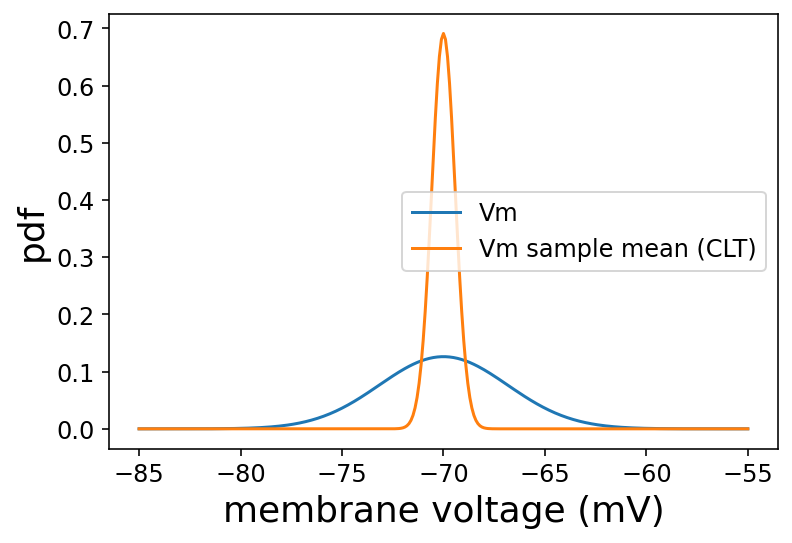

In [65]:
mean_Vm_dist = st.norm(mu, sd / np.sqrt(30))

plt.plot(mV, Vm_dist.pdf(mV), label='Vm')
plt.plot(mV, mean_Vm_dist.pdf(mV), label='Vm sample mean (CLT)')
plt.xlabel('membrane voltage (mV)')
plt.ylabel('pdf')
plt.legend();

## Example

A neuron spikes 1.5 times per second on average. Plot the probability density function of interspike intervals from zero to five seconds with a resolution of 0.01 seconds.

---

In this case the random variable is the interspike interval time.

What distribution would you use to model the interspike interval?

In [66]:
spike_rate = 1.5  # average spike rate (/s)

mean_isi = 1 / spike_rate  # mean interspike interval

# exponential distribution describing the interspike intervals
isi_dist = st.expon(loc=0, scale=mean_isi)

Plot the probability density function.

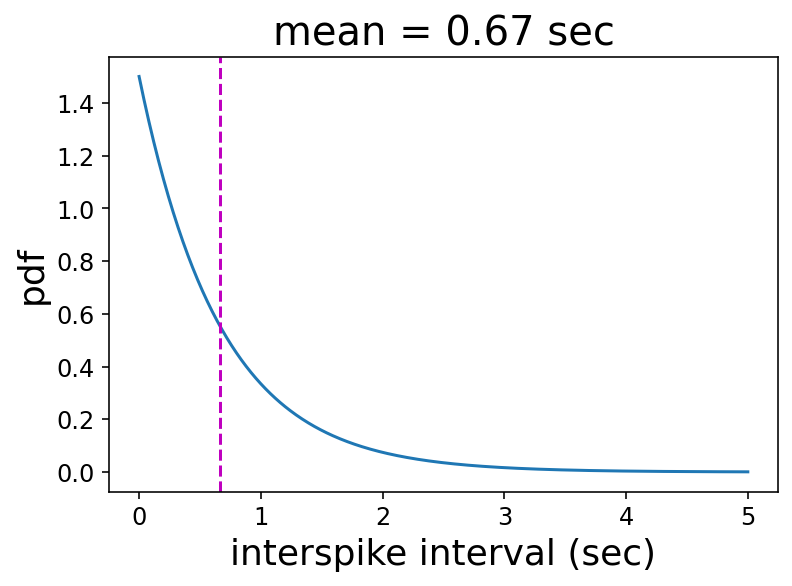

In [79]:
# intervals from 0-5 seconds at 0.01 sec resolution
intervals = np.linspace(0, 5, 501)

# plot probability density for each interval
plt.plot(intervals, isi_dist.pdf(intervals))
plt.axvline(mean_isi, ls='--', color='m')
plt.xlabel('interspike interval (sec)')
plt.ylabel('pdf')
plt.title(f'mean = {mean_isi:.2f} sec');

`rate = 1 / mean`

Thus, to describe a dataset that is exponentially distributed, you only need to know the `mean` of the dataset.

In [10]:
spike_rate, 1 / isi_dist.mean()

(1.5, 1.5)

What is the average interspike interval?

In [11]:
print(f"Average interspike interval = {isi_dist.mean():.2f} seconds.")

Average interspike interval = 0.67 seconds.


What is the probability that an interval will be between 1 and 2 seconds?

In [12]:
prob1to2 = isi_dist.cdf(2) - isi_dist.cdf(1)

print(f"Probability of an interspike interval being between 1 and 2 seconds is {prob1to2:.2f}")

Probability of an interspike interval being between 1 and 2 seconds is 0.17


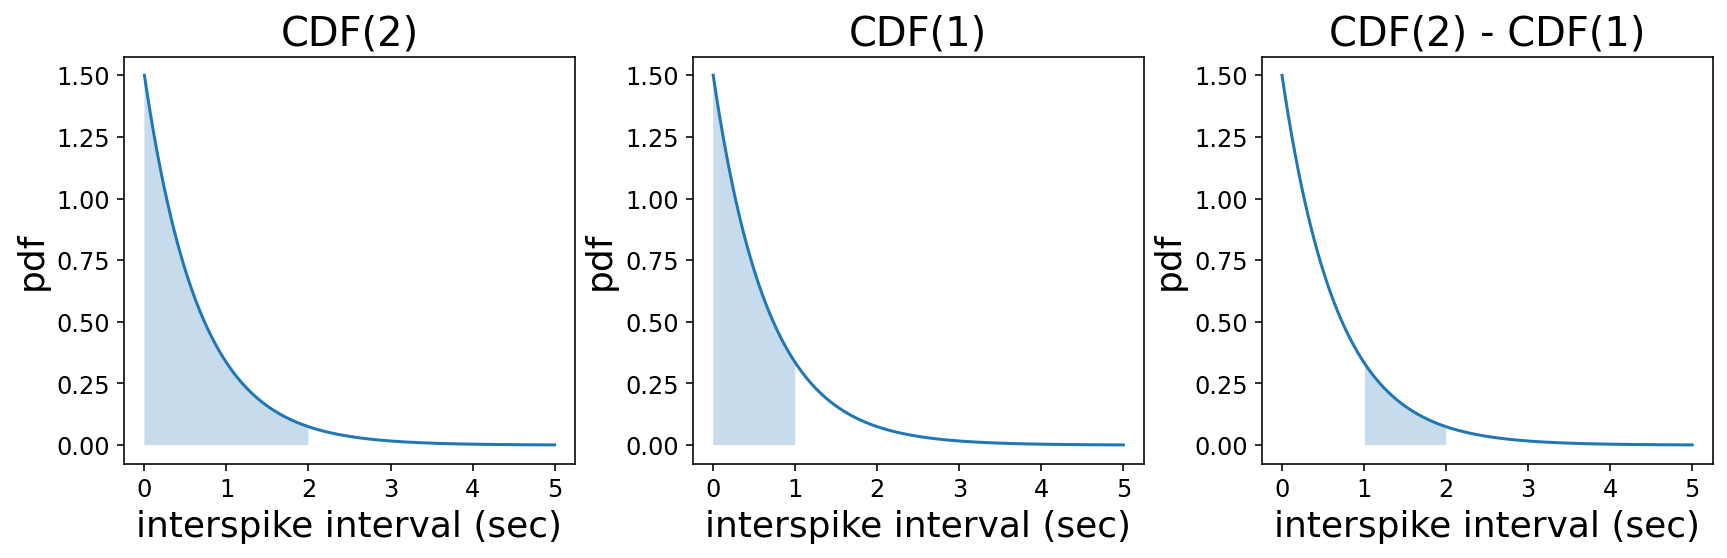

In [42]:
# CDFs
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(intervals, isi_dist.pdf(intervals))
x = intervals[intervals <= 2]
plt.fill_between(x, np.zeros(x.shape), isi_dist.pdf(x), alpha=0.25)
plt.xlabel('interspike interval (sec)')
plt.ylabel('pdf')
plt.title('CDF(2)')

plt.subplot(1, 3, 2)
plt.plot(intervals, isi_dist.pdf(intervals))
x = intervals[intervals <= 1]
plt.fill_between(x, np.zeros(x.shape), isi_dist.pdf(x), alpha=0.25)
plt.xlabel('interspike interval (sec)')
plt.ylabel('pdf')
plt.title('CDF(1)')

plt.subplot(1, 3, 3)
x = intervals[(intervals <= 2) & (intervals > 1)]
plt.fill_between(x, np.zeros(x.shape), isi_dist.pdf(x), alpha=0.25)
plt.plot(intervals, isi_dist.pdf(intervals))
plt.xlabel('interspike interval (sec)')
plt.ylabel('pdf')
plt.title('CDF(2) - CDF(1)')

plt.tight_layout();

For what time *T* is the probability that an interval is shorter than *T* equal to 25%?

In [24]:
timeAtFirst25PercentOfDist = isi_dist.ppf(0.25)  # first 25% of distribution (percent point function)

print(f"There is a 25% chance that an interval is shorter than {timeAtFirst25PercentOfDist:.2f} seconds.")

There is a 25% chance that an interval is shorter than 0.19 seconds.


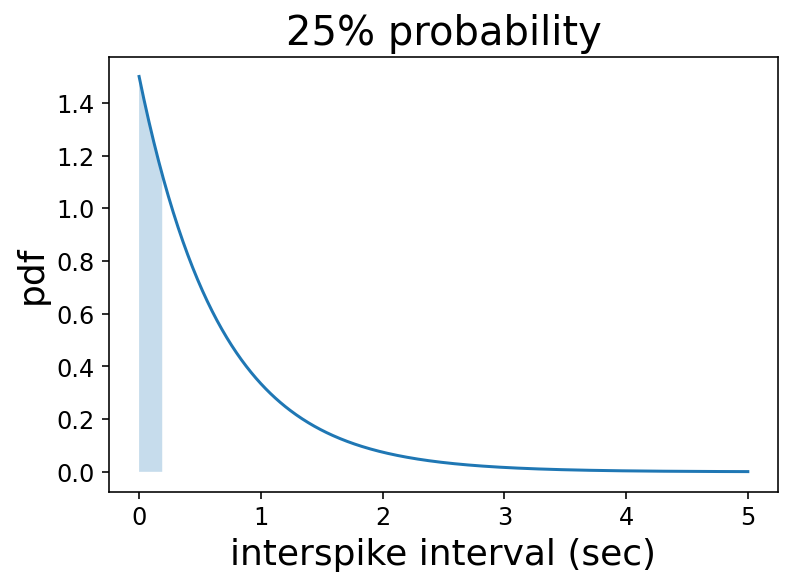

In [43]:
# first 25%
plt.plot(intervals, isi_dist.pdf(intervals))
x = intervals[intervals < timeAtFirst25PercentOfDist]
plt.fill_between(x, np.zeros(x.shape), isi_dist.pdf(x), alpha=0.25)
plt.xlabel('interspike interval (sec)')
plt.ylabel('pdf')
plt.title('25% probability');

## Exercise

For the above example, what is the probability that 3 seconds will pass without any spikes?

## Example

Assume that the rate of deleterious mutations is ~1.2 per diploid genome. What is the probability that an individual has 8 or more spontaneous deleterious mutations?

---

In this case the random variable is the number of deleterious mutations within an individuals genome.

What distribution would you use to model the number of mutations per individual?

In [44]:
mut_rate = 1.2  # the mean rate of deleterious mutations per diploid genome

# poisson distribution describing the number of spontaneous mutations per individual
mut_dist = st.poisson(mut_rate)

In [45]:
# probability of 3 mutations
mut_dist.pmf(3)

0.08674393303071422

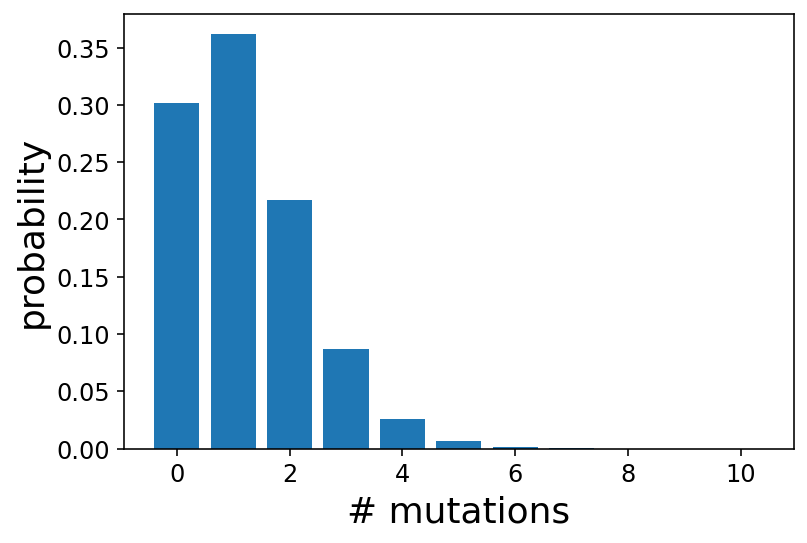

In [46]:
# let's look at the probability for 0-10 mutations
num_mutations = np.arange(11)

# probability for each number of mutations from 0-10
pmf = mut_dist.pmf(num_mutations)

plt.bar(num_mutations, pmf)
plt.xlabel('# mutations')
plt.ylabel('probability');

`average rate = mean`

Thus, to describe a dataset you only need to know the `mean` of the dataset.

In [47]:
mut_rate, mut_dist.mean()

(1.2, 1.2)

What is the probability that an individual will have 8 or more mutations?

In [48]:
print(f"Probability of less than 8 mutations = {mut_dist.cdf(7)}")
print(f"Probability of 8 or more mutations = {mut_dist.sf(7)}")

mut_dist.cdf(7) + mut_dist.sf(7)

Probability of less than 8 mutations = 0.9999630211320938
Probability of 8 or more mutations = 3.6978867906171055e-05


1.0

## Exercise

For the above example, what is the probability that an individual has three or fewer mutations?

## Example

A couple, who are both carriers for a recessive disease, wish to have 5 children. They want to know the probability that they will have four healthy children.

---

In this case the random variable is the number of healthy children.

What distribution would you use to describe the number of healthy children out of 5 total?

In [49]:
n = 5  # total number of children
p = 0.75  # probability that each child is healthy = 1 - 0.5 * 0.5 = 0.75

# binomial distribution describing the number of healthy children out of 5 total children
num_healthy_dist = st.binom(n, p)

In [50]:
# probability of four healthy children
num_healthy_dist.pmf(4)

0.39550781250000006

What is the probability of each possible number of healthy children?

In [51]:
# all possible numbers of healthy children
np.arange(n+1)

array([0, 1, 2, 3, 4, 5])

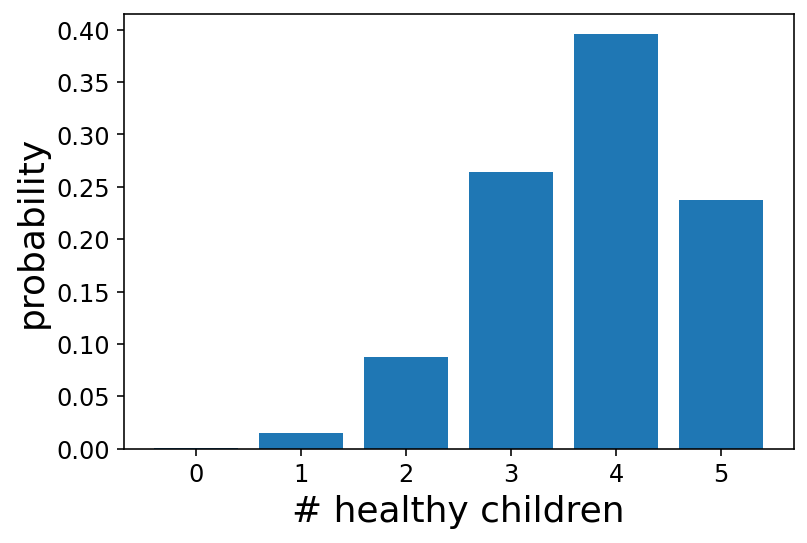

In [52]:
x = np.arange(n+1)
pmf = num_healthy_dist.pmf(x)

plt.bar(x, pmf)
plt.xlabel('# healthy children')
plt.ylabel('probability');

`p = mean / n`

Thus, to describe a dataset that is binomially distributed, you only need to know the `mean` of the dataset and the total number of trials `n`.

In [53]:
p, num_healthy_dist.mean() / n

(0.75, 0.75)

What is the probability that at least 4 children will be healthy?

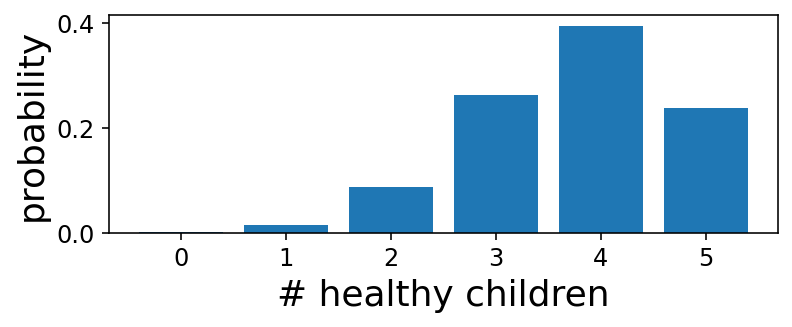

In [54]:
# pmf
plt.figure(figsize=(6,2))
plt.bar(x, pmf)
plt.xlabel('# healthy children')
plt.ylabel('probability');

In [55]:
# sum of probabilities of 4 and 5 healthy kids
pmf[-2:].sum()

0.6328125

In [56]:
# remaining probability after subtracting CDF for 3 healthy children
1 - num_healthy_dist.cdf(3)

0.6328125

In [57]:
# survival function after 3 healthy children
num_healthy_dist.sf(3)

0.6328125

What is the expected number of healthy children?

In [58]:
print(f"The expected number of healthy children is {num_healthy_dist.mean()}")

The expected number of healthy children is 3.75


How sure are we about the above estimate?

In [59]:
print(f"The expected number of healthy children is {num_healthy_dist.mean()} ± {num_healthy_dist.std():.2f}")

The expected number of healthy children is 3.75 ± 0.97


## Exercise

Should the couple consider having six children?

    1. Plot the pmf for the probability of each possible number of healthy children.
    2. What's the probability that they will all be healthy?

In [ ]:
n = 6  # total number of children
p = 0.75  # probability that each child is healthy = 1 - 0.5 * 0.5 = 0.75

# binomial distribution describing the number of healthy children out of 6 total children
num_healthy_dist = ...

# all possible numbers of healthy children out of 6
x = np.arange(n+1)

# probability for each possible number of healthy children
pmf = ...

plt.bar(x, pmf)
plt.xlabel('# healthy children')
plt.ylabel('probability');

# probability that all 6 children are healthy
P_all_6_healthy = ...

print(f'The probability that all six children are healthy is {P_all_6_healthy:.2f}.')

## Example: Fitting Data

You measure the number of mutations in 300 individuals and store those values in the variable `sample_num_mutations`.

We'll just simulate the data here and pretend that you measured it.

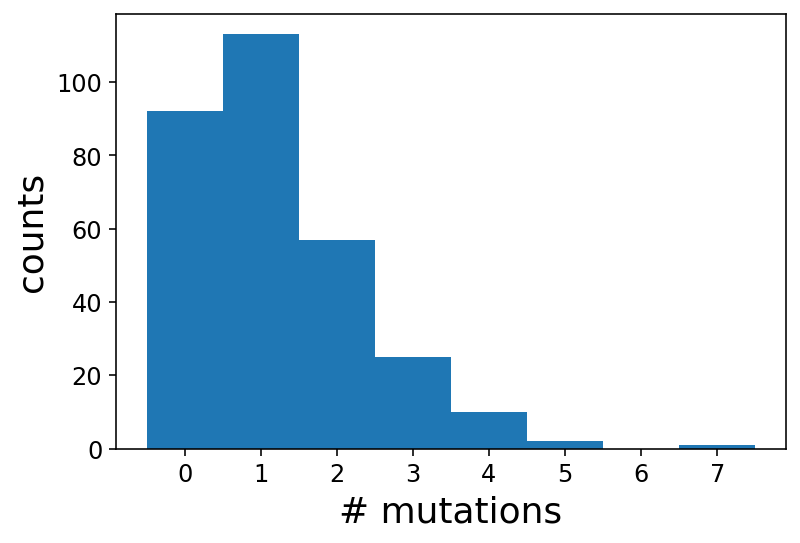

In [62]:
# random values for the number of mutations 
# drawn from the distribution in the example above
sample_num_mutations = mut_dist.rvs(300)

bin_edges = np.arange(9) - 0.5

plt.hist(sample_num_mutations, bin_edges)
plt.xlabel('# mutations')
plt.ylabel('counts');

What Poisson distribution parameter(s) best describe the simulated dataset above?

In [63]:
# average mutation rate per individual in the sample of 300 people
sample_mut_rate = sample_num_mutations.mean()
sample_mut_rate

1.1966666666666668

Ok, so let's create a distribution that describes the sample data.

In [80]:
sample_dist = st.poisson(sample_mut_rate)

Plot the sample data overlaid with the model distribtuion.

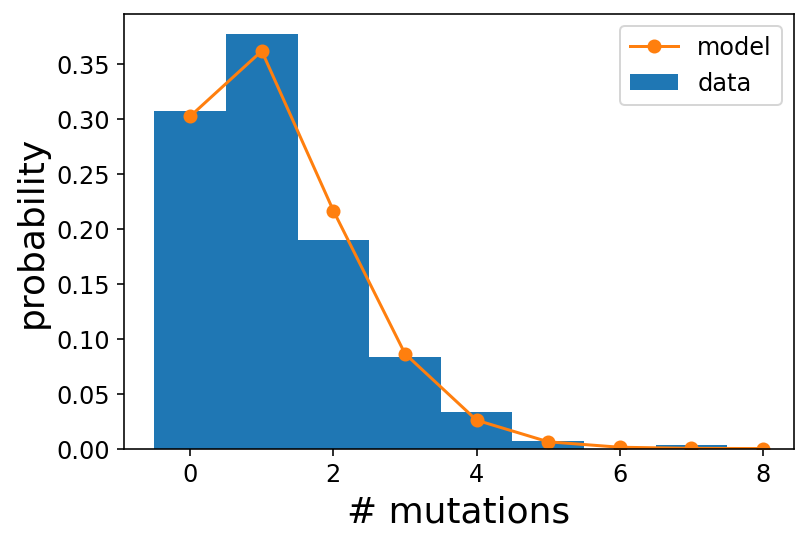

In [81]:
num_mutations = np.arange(9)

sample_pmf = sample_dist.pmf(num_mutations)

plt.hist(sample_num_mutations, bin_edges, density=True, label='data')  # scaled as probability instead of counts
plt.plot(num_mutations, sample_pmf, 'o-', label='model')
plt.xlabel('# mutations')
plt.ylabel('probability')
plt.legend();

## Exercise: Fitting Data

Given the simulated measurements for observed interspike intervals in `observed_isi`:

    1. Describe the data by an exponential distribution.
    2. Plot the data distribution overlaid with the model exponential PDF.

In [ ]:
observed_isi = isi_dist.rvs(1000)

# observed_isi exponential distribution
# Hint: What parameters do you need to know for an exponential distribution?
#       And how do you estimate these parameters from the sample dataset?
isi_exp_dist = ...

# range of intervals over which to plot the distribution
isi_range = np.linspace(0, 6, 601)

# pdf over isi_range
isi_pdf = ...

bin_edges = np.linspace(0,10,21)
plt.hist(observed_isi, bin_edges, density=True, label='data')
plt.plot(isi_range, isi_pdf, label='model')
plt.xlabel('interspike interval (sec)')
plt.ylabel('pdf')
plt.legend();